# DLBDSEDAV01 – Exploratory Data Analysis (EDA) and Visualization

## Task 1: Visually Exploring a Dataset

### Life Expectancy Dataset – EDA Project Overview

This project uses Exploratory Data Analysis (EDA) to examine the Life Expectancy dataset. The goal is to identify trends, patterns, and relationships between life expectancy and various socio-economic and health factors using statistical techniques and visualizations.

---

## 1. Dataset Overview

This dataset is a compilation of health and economic indicators collected by the World Health Organization (WHO)
for 193 countries from 2000 to 2015. It essentially provides a time series of various metrics
categorized by nation, aiming to explore factors influencing life expectancy.

- **Source**: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

### Main Columns (Numerical Features for Analysis):
## Column Descriptions

- **`Life expectancy`**  
  *Target variable for primary analysis.*  
  Refers to the average number of years a person is expected to live, based on the year of birth, current age, and other demographic factors.

- **`Adult Mortality`**  
  Probability of dying between the ages of 15 and 60 per 1,000 adult population.

- **`infant deaths`**  
  Number of deaths among infants (children under 1 year) per 1,000 live births in a given year.

- **`Alcohol`**  
  Average alcohol consumption (in litres of pure alcohol) per adult (aged 15+) per year.

- **`percentage expenditure`**  
  Expenditure on health as a percentage of GDP per capita.

- **`Hepatitis B`**  
  Percentage of 1-year-old children who have received the Hepatitis B vaccination.

- **`Measles`**  
  Number of reported measles cases per year per 1,000 population.

- **`BMI`**  
  Average Body Mass Index of the population, a measure of body fat based on height and weight.

- **`under-five deaths`**  
  Number of deaths of children under 5 years of age per 1,000 live births.

- **`Polio`**  
  Percentage of 1-year-old children who have received the polio vaccine.

- **`Total expenditure`**  
  Total public and private health expenditure as a percentage of GDP.

- **`Diphtheria`**  
  Percentage of 1-year-old children who have received the Diphtheria, Pertussis, and Tetanus (DPT) vaccine.

- **`HIV/AIDS`**  
  Deaths per 1,000 live births due to HIV/AIDS in a given year.

- **`GDP`**  
  Gross Domestic Product per capita (in USD).

- **`Population`**  
  Total population of the country in the given year.

- **`thinness 1-19 years`** *(To be renamed to `thinness 10-19 years`)*  
  Percentage of the population aged 10–19 who are underweight based on BMI.

- **`thinness 5-9 years`**  
  Percentage of children aged 5–9 who are underweight based on BMI.

- **`Income composition of resources`**  
  Human Development Index (HDI) component based on income—measures inequality in income distribution.

- **`Schooling`**  
  Average number of years of schooling received by people aged 25 and older.



## 2. Data Preparation and Cleaning

This section involves loading the dataset, inspecting its initial structure, handling missing values, and renaming columns to ensure the data is suitable for analysis.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set aesthetic style for plots
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

# Robustly clean column names: strip leading/trailing whitespace and replace multiple internal spaces with single space
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [48]:
# Display concise summary of the DataFrame
print("\nConcise summary of the DataFrame:")
df.info()


Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null 

### Handling Missing Values

**Q1. Detect and Deal with the Missing Values**

We will first check for missing values across all columns. For numerical features,
missing values will be imputed with the mean of their respective column.
This approach is chosen for simplicity and to retain as much data as possible,
assuming missingness is random or ignorable.

In [49]:
#Missing values
print("\nMissing values before imputation:")
df.isnull().sum()


Missing values before imputation:


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [50]:
# --- FIX: Robustly Clean column names ---
# Strip leading/trailing whitespace and replace multiple internal spaces with single space
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

print("\nColumns after robust cleaning:")
print(df.columns.to_list())

# --- Data Preparation and Cleaning ---
# Fill missing numerical values with the mean of their respective column
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())

print("\nMissing values after imputation:")
df.isnull().sum()


Columns after robust cleaning:
['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

Missing values after imputation:


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


### Column Renaming & Numerical Features List

Rename 'thinness 1-19 years' to 'thinness 10-19 years' for better clarity as it is a more true representation of what the variable signifies.

In [51]:
if 'thinness 1-19 years' in df.columns:
    df.rename(columns={'thinness 1-19 years': 'thinness 10-19 years'}, inplace=True)
    print("\nRenamed 'thinness 1-19 years' to 'thinness 10-19 years'.")
else:
    print("\n'thinness 1-19 years' column not found, likely already renamed or does not exist.")

# Dynamically get numerical features after potential renaming
numerical_features = df.select_dtypes(include=[np.number]).columns.to_list()
print("\nNumerical features after cleaning and renaming:")
print(numerical_features)


Renamed 'thinness 1-19 years' to 'thinness 10-19 years'.

Numerical features after cleaning and renaming:
['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


## 3. Describing Location and Variability (Central Tendency and Spread)

To understand the core characteristics of the numerical features, we calculate descriptive statistics for all of them. This provides insights into their central tendency (mean, median), and variability (standard deviation, quartiles, range).

In [46]:
print("--- Descriptive Statistics for All Numerical Features ---")
# Select only numerical columns for description
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

--- Descriptive Statistics for All Numerical Features ---


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Interpretation of Descriptive Statistics:**

The table above provides key summary statistics for all numerical features in the dataset:

- Count: Indicates the number of non-null entries for each column, confirming successful imputation of missing values.
- Mean: The arithmetic average of the values. For Life expectancy, the mean is approximately 69.22 years.
- Std (Standard Deviation): Measures the dispersion of data points around the mean. A higher standard deviation indicates greater variability. For Life expectancy, a standard deviation of 9.51 suggests a moderate spread.
- Min/Max: The minimum and maximum values, showing the full range of the data.
- 25%, 50% (Median), 75%: These are the quartiles. The 50th percentile is the median. Comparing the mean and median can give an indication of skewness. For instance, if the mean is notably different from the median, the distribution might be skewed.

When to use the Median instead of the Arithmetic Mean:
The median is often preferred over the arithmetic mean when the data distribution is skewed or contains outliers. In such cases, extreme values can significantly pull the mean towards them, making it less representative of the 'typical' value. The median, being the middle value, is more robust to outliers and provides a better measure of central tendency for skewed distributions. For example, Population and GDP show a large difference between mean and median, suggesting significant right-skewness due to some very large values.

## 4. Data Exploration and Visualization

This section delves into the relationships and distributions within the data,
addressing specific questions about life expectancy and its influencing factors.

## General Distributions of All Numerical Features

Visualizing the distribution of all numerical features using histograms and KDE plots.
This helps in understanding the shape of data, skewness, and potential outliers.
Python

**Q2. Detect and Handle Outliers**

Outlier detection can be done using various methods (e.g., Z-scores, IQR method, visual inspection via box plots).
For this EDA, we primarily rely on visual inspection through distribution plots (histograms, box plots, violin plots)
to identify potential outliers. While specific outlier capping/transformation is not performed
at this stage to preserve original data distribution for initial exploration,
their presence is noted as part of the distributional analysis.
If modeling were the next step, more formal outlier treatment (e.g., Winsorization or robust scaling)
would be applied.

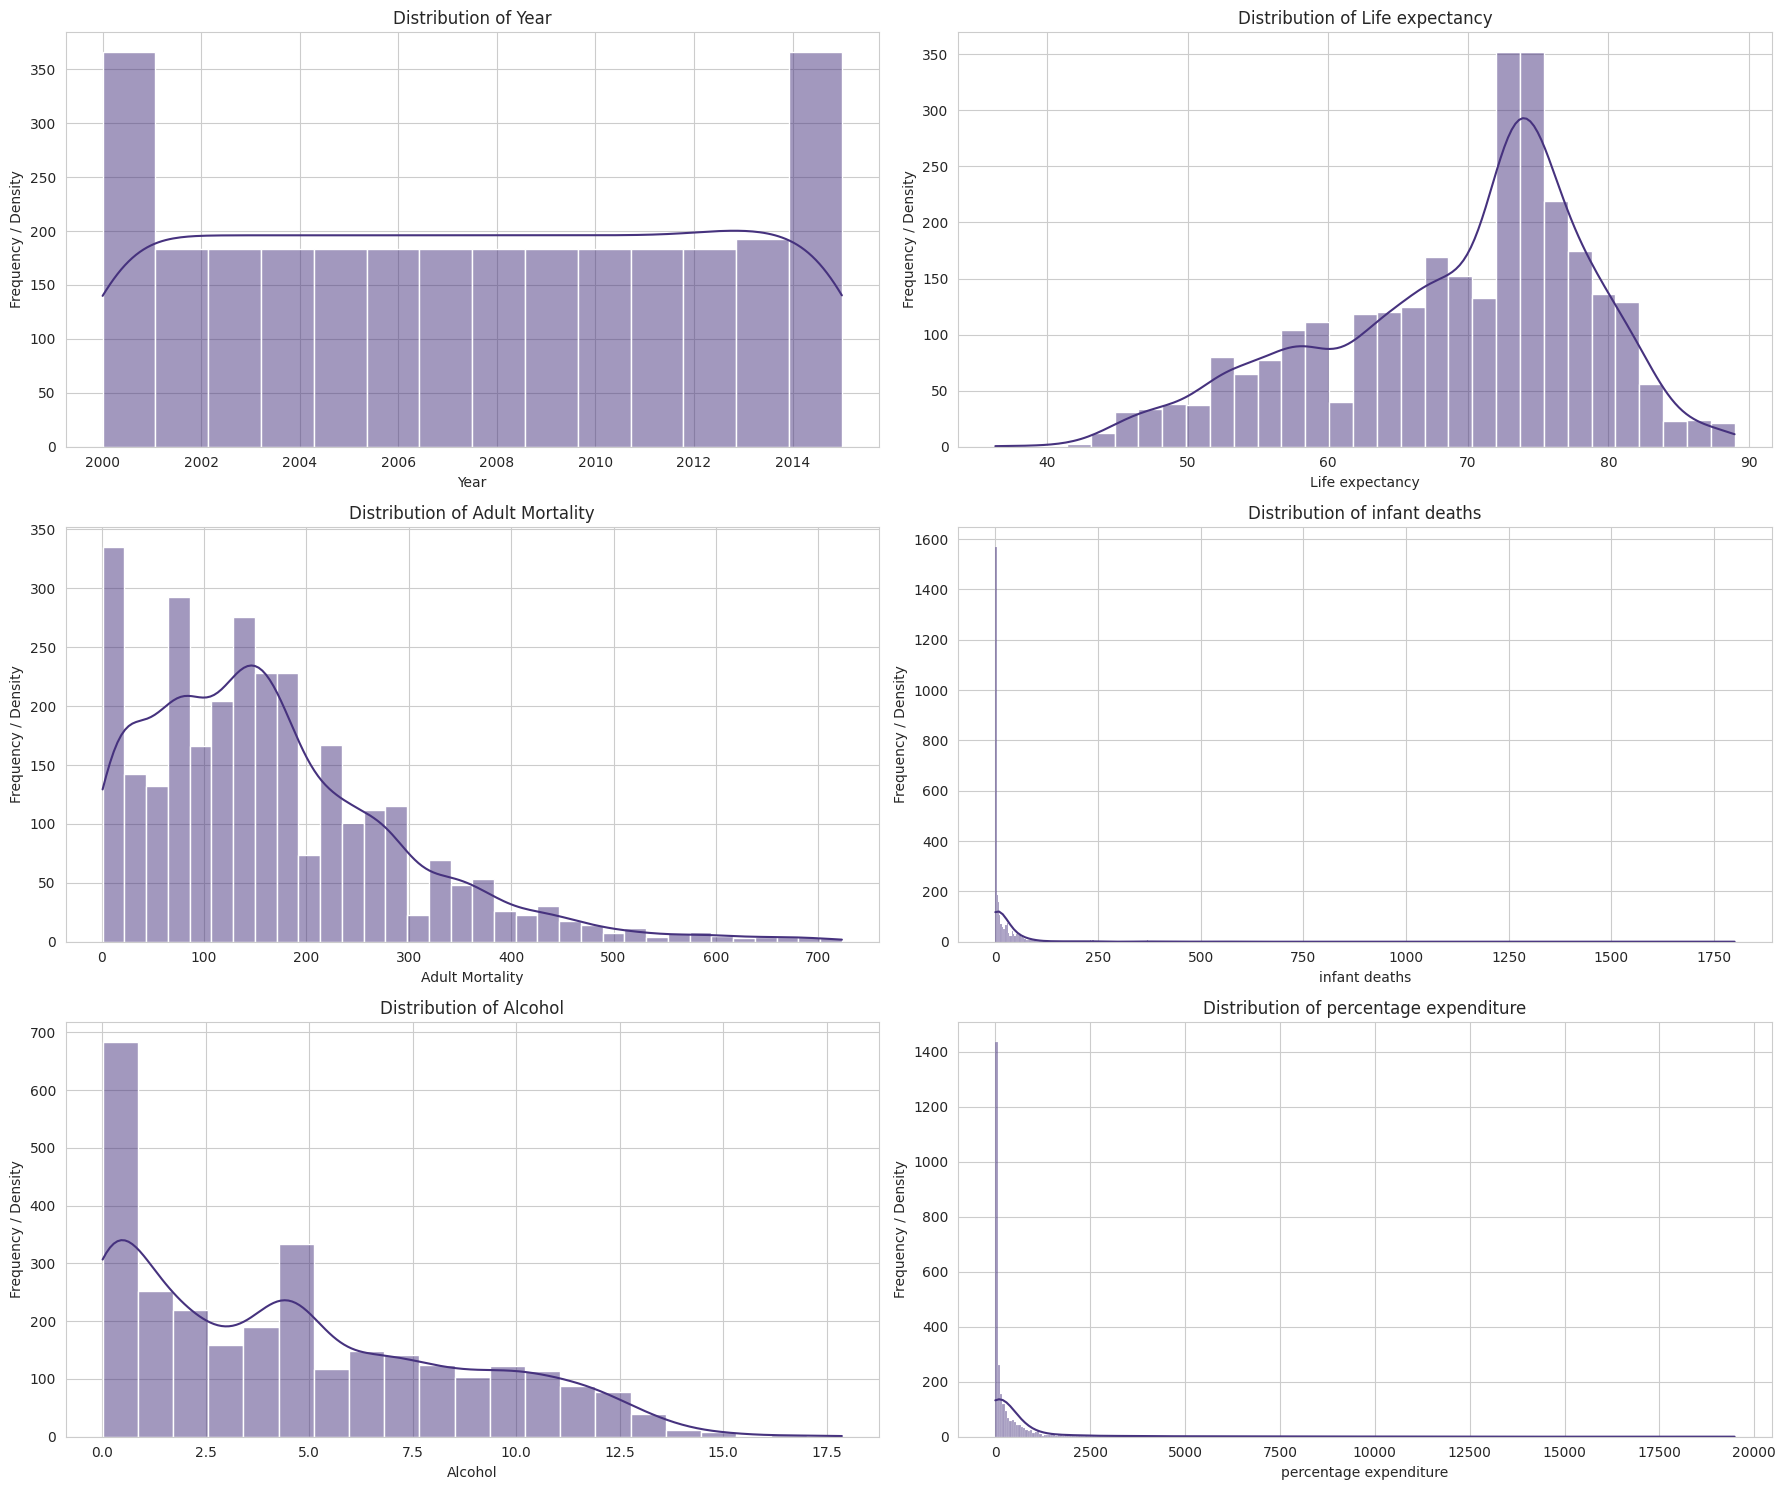

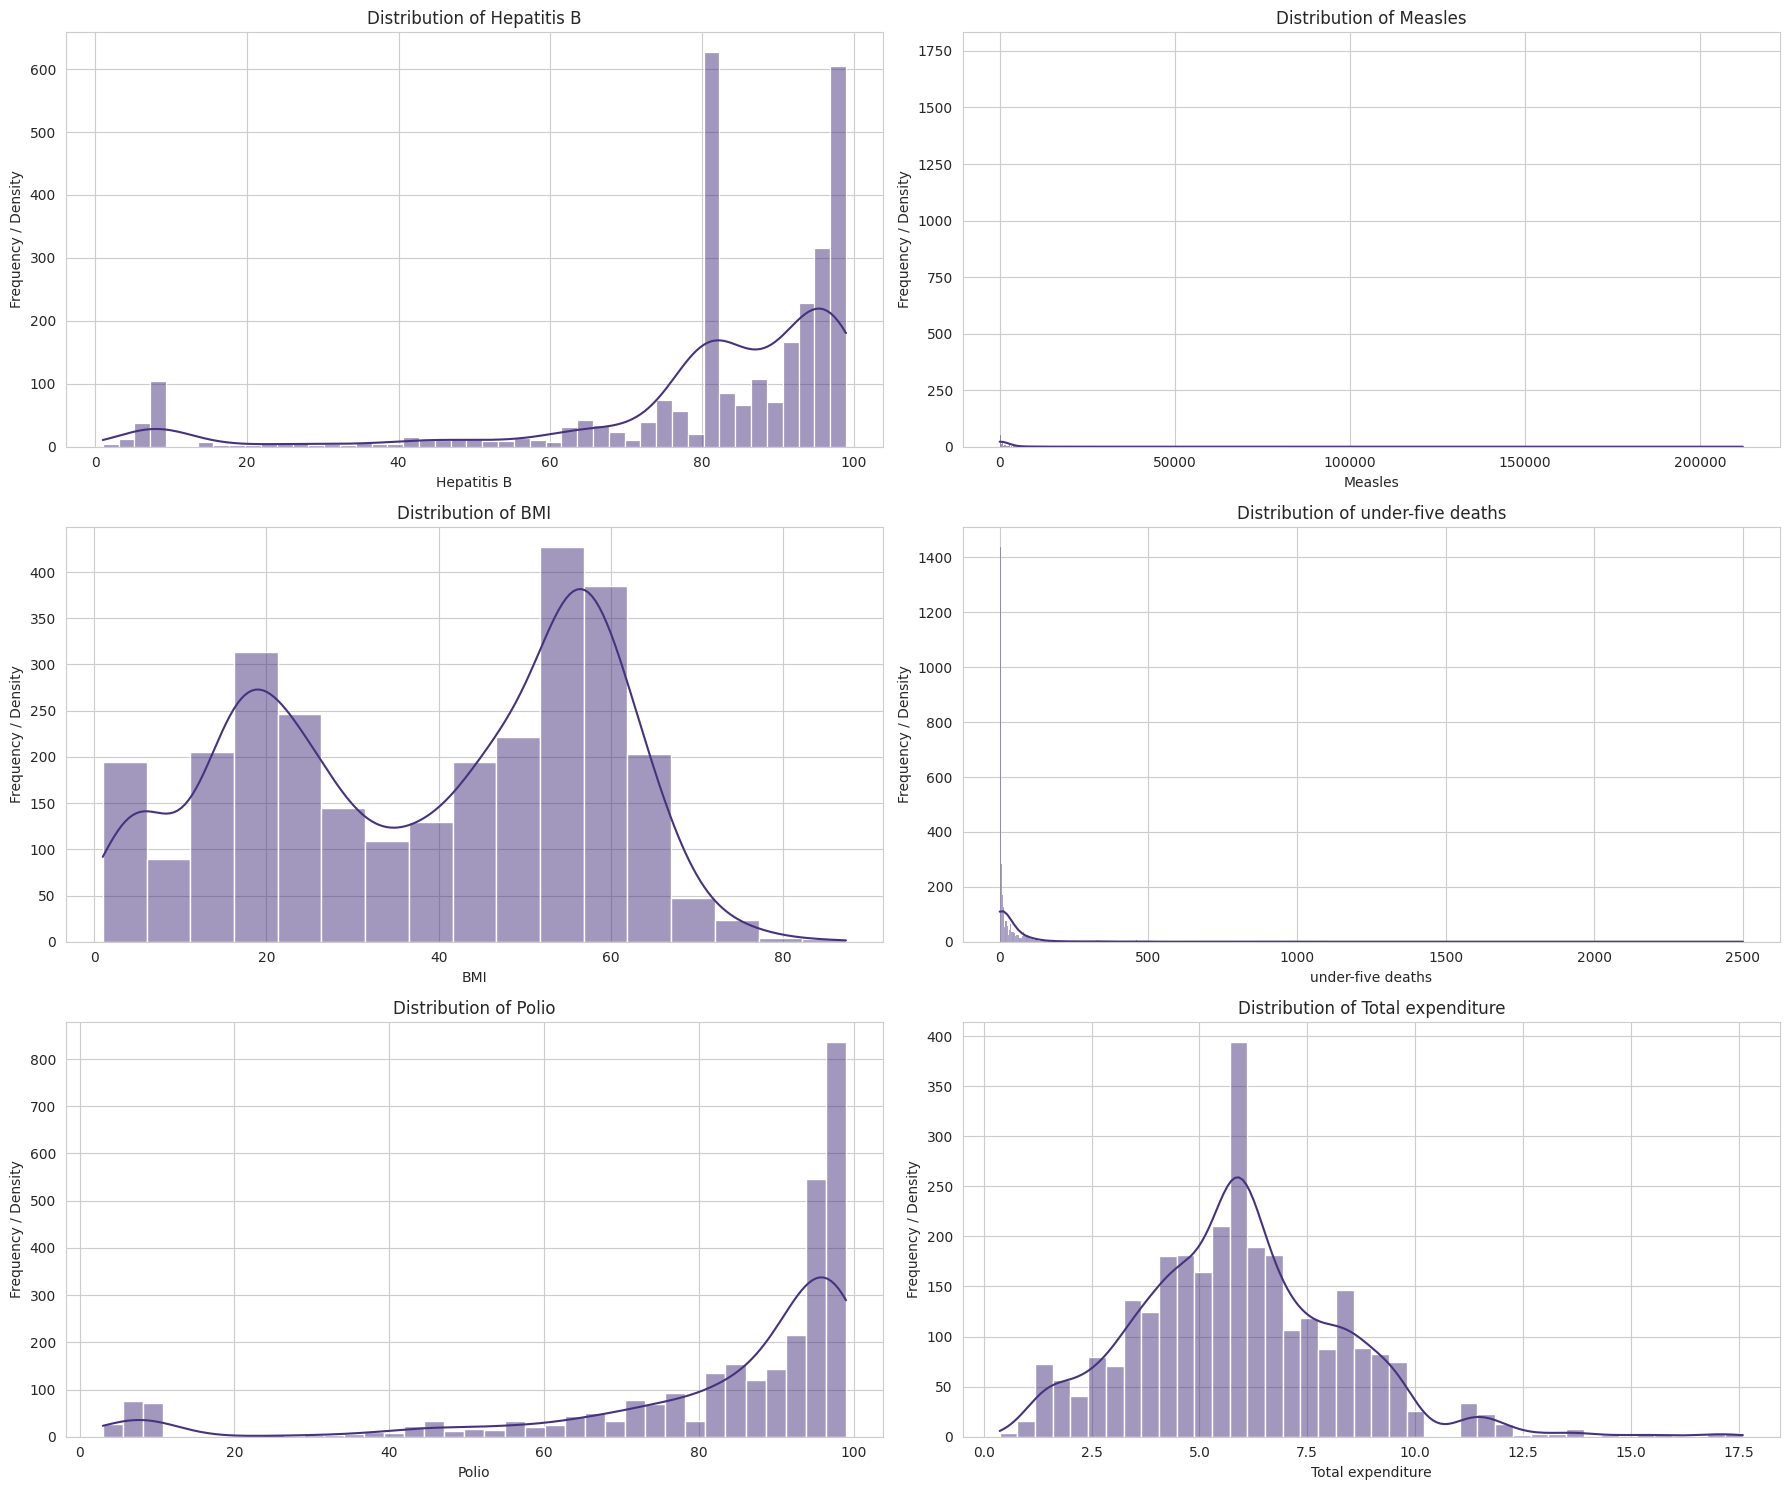

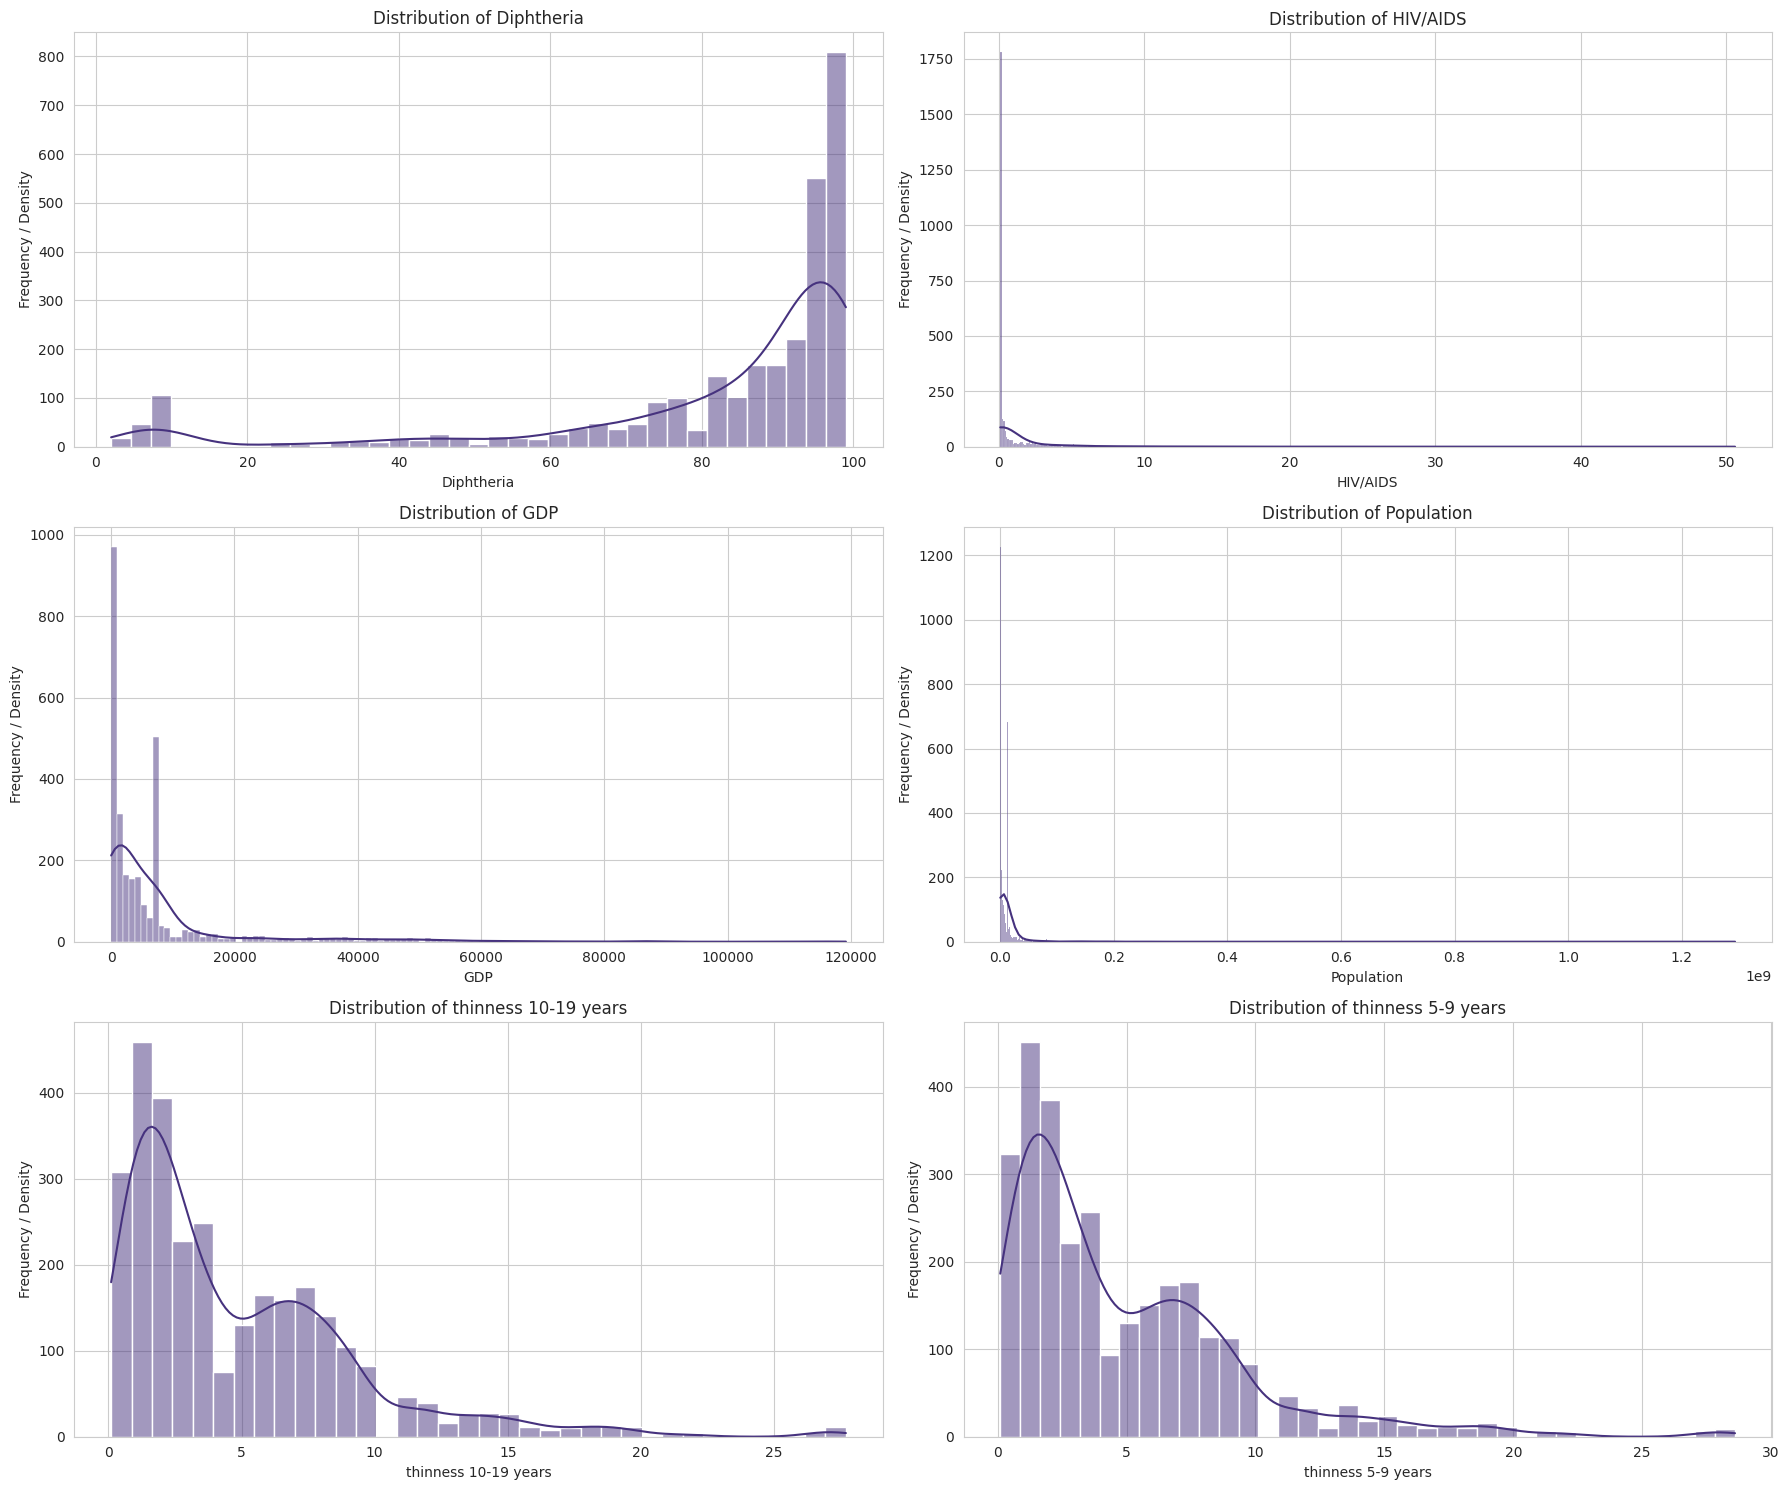

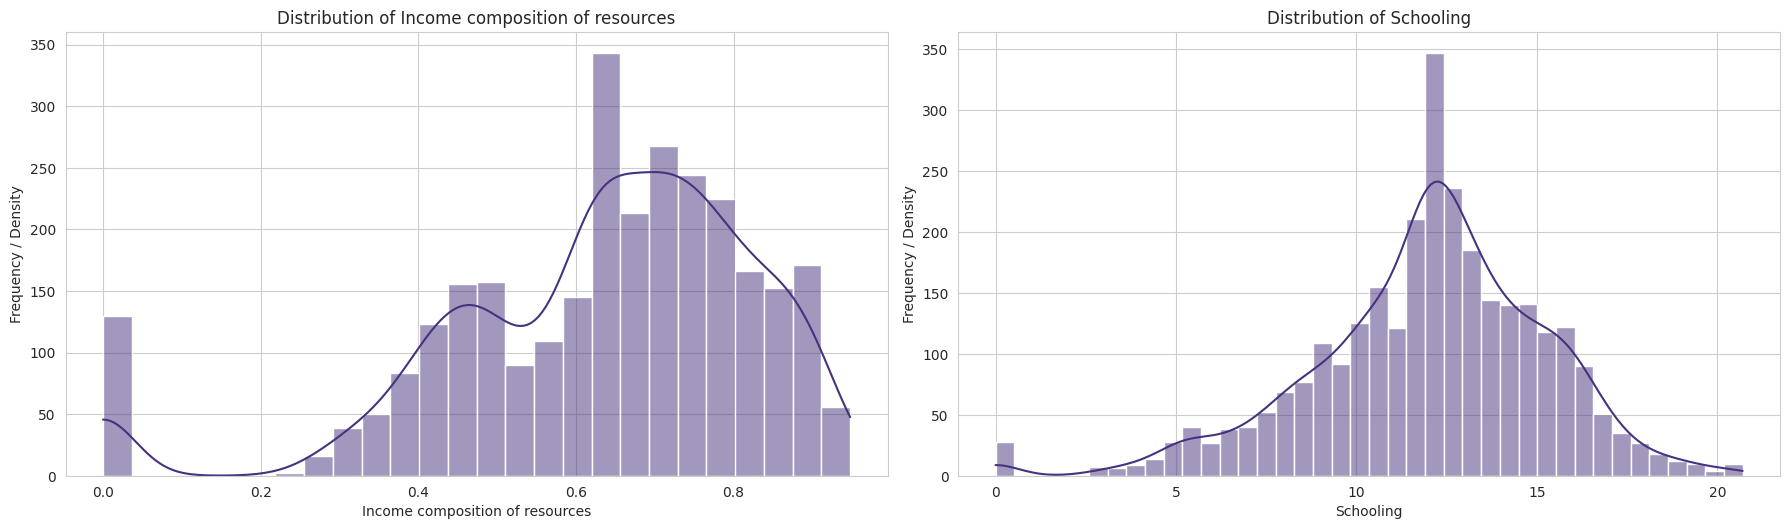

In [52]:
num_plots_per_fig = 6
num_figures = (len(numerical_features) + num_plots_per_fig - 1) // num_plots_per_fig

for i in range(num_figures):
    plt.figure(figsize=(18, 15))
    start_idx = i * num_plots_per_fig
    end_idx = min((i + 1) * num_plots_per_fig, len(numerical_features))

    for j, col in enumerate(numerical_features[start_idx:end_idx]):
        plt.subplot(3, 2, j + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency / Density')
    plt.tight_layout()
    plt.savefig(f'distributions_part_{i+1}.png')
    plt.show()

**Understanding the Normal Distribution:**

From the histograms and KDE plots, we can observe the shape of each feature's distribution. Many real-world datasets, like this one, do not perfectly follow a normal (bell-shaped, symmetric) distribution. For example:

- Life expectancy: Appears somewhat negatively skewed (left-skewed), with a tail extending towards lower values and a concentration at higher life expectancies.
- Infant deaths, Measles, under-five deaths, HIV/AIDS, Population: Show strong right-skewness, with a large number of countries having very low values and a few outliers with extremely high counts.
- Alcohol, BMI, Schooling, Income composition of resources: Tend to show more symmetrical or slightly skewed distributions.

Recognizing these deviations from normality is important as many parametric statistical tests assume normality. For skewed data, transformations or non-parametric tests might be more appropriate. The area under the Probability Density Function (KDE plot) can be used to determine the probability of a value falling within a certain range.

## Box and Violin Plots for Key Features

These plots help visualize the distribution and identify outliers for selected key numerical features.

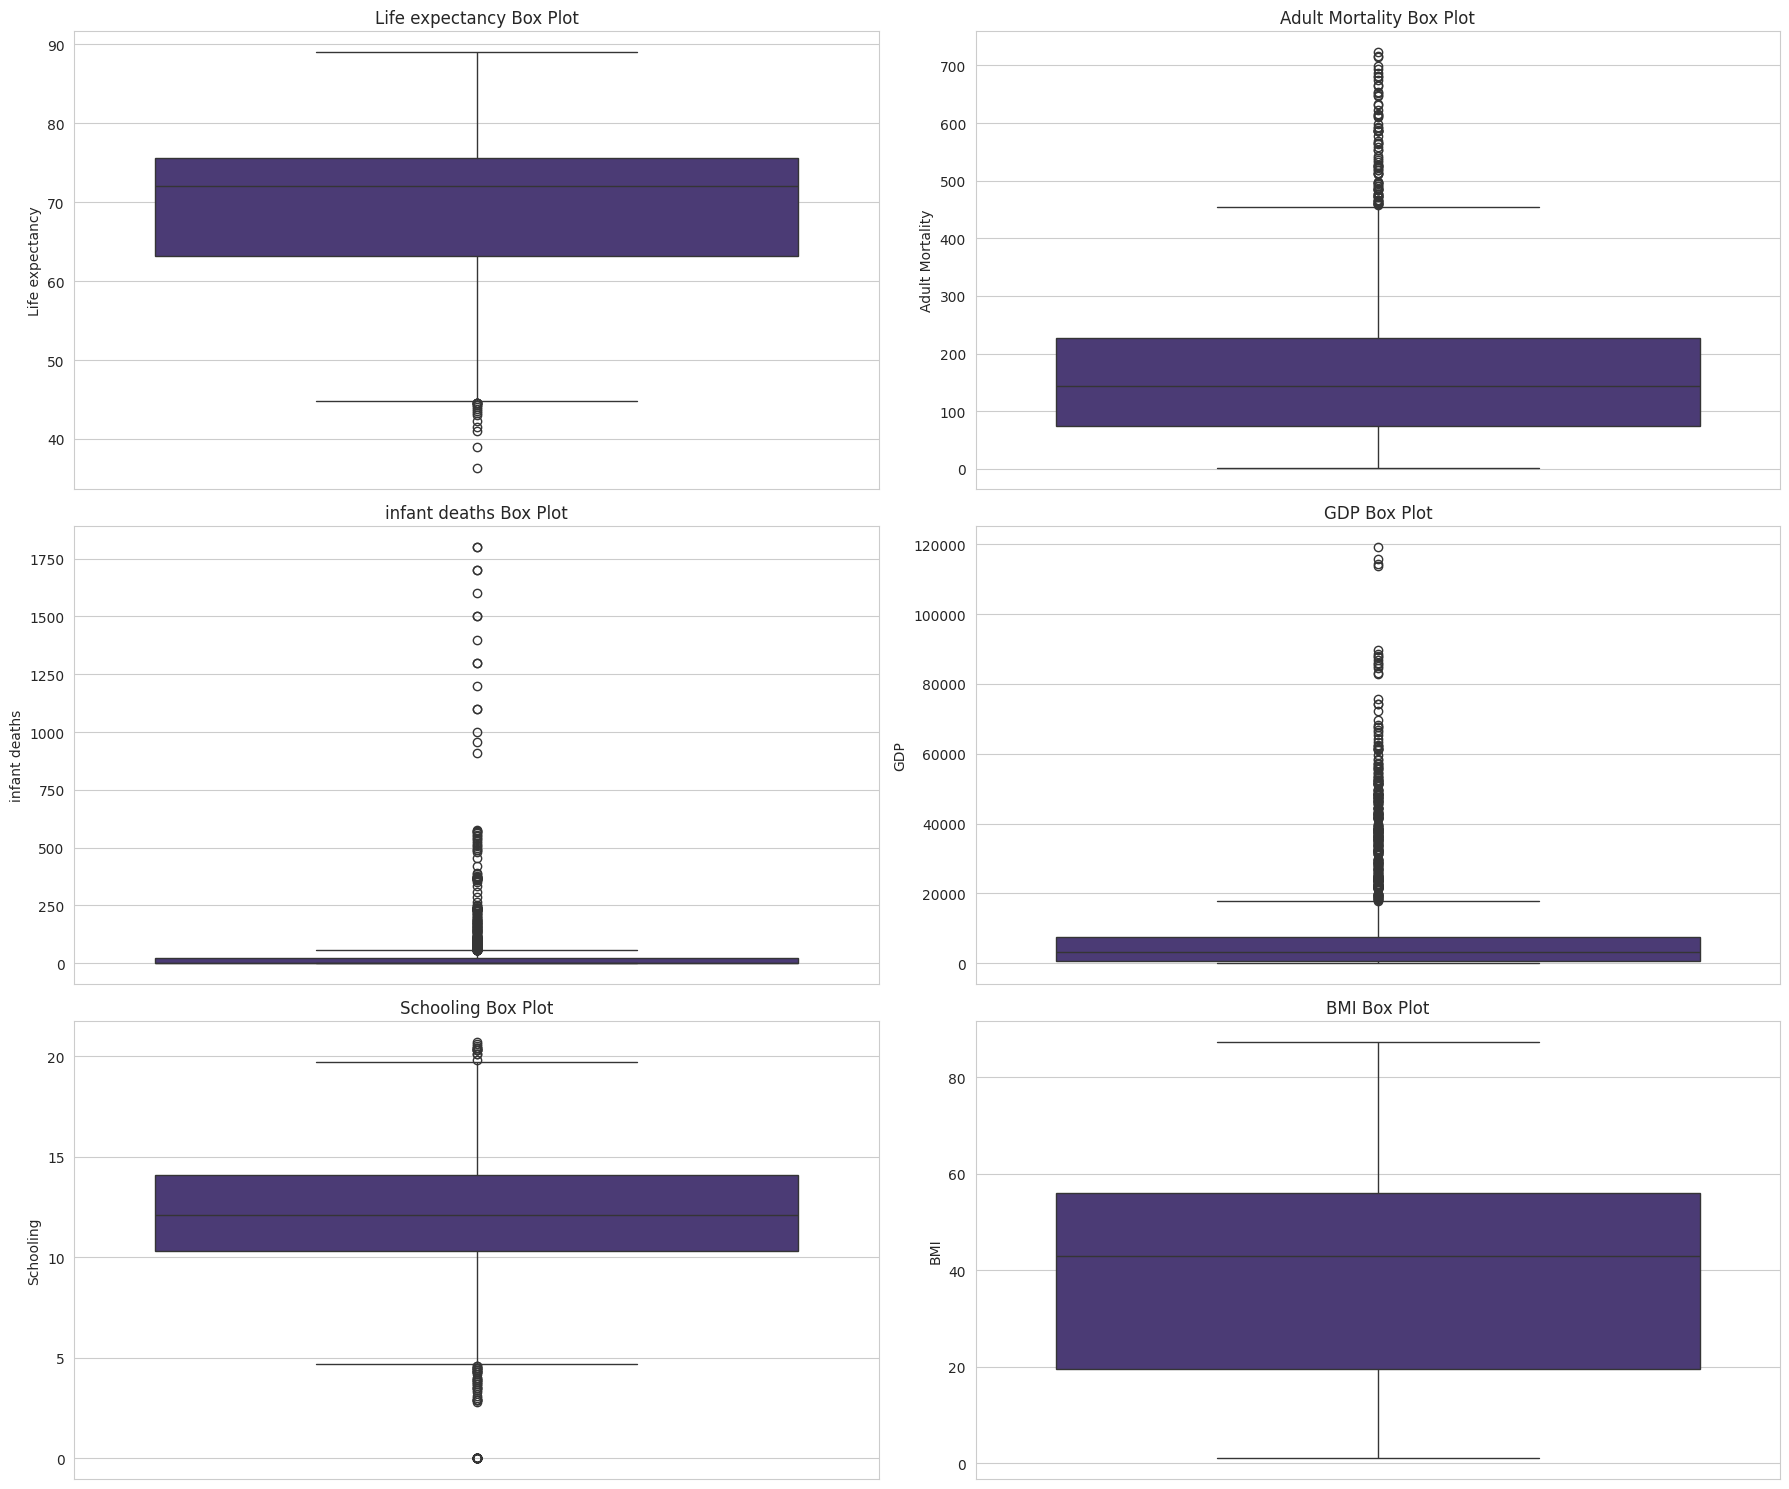

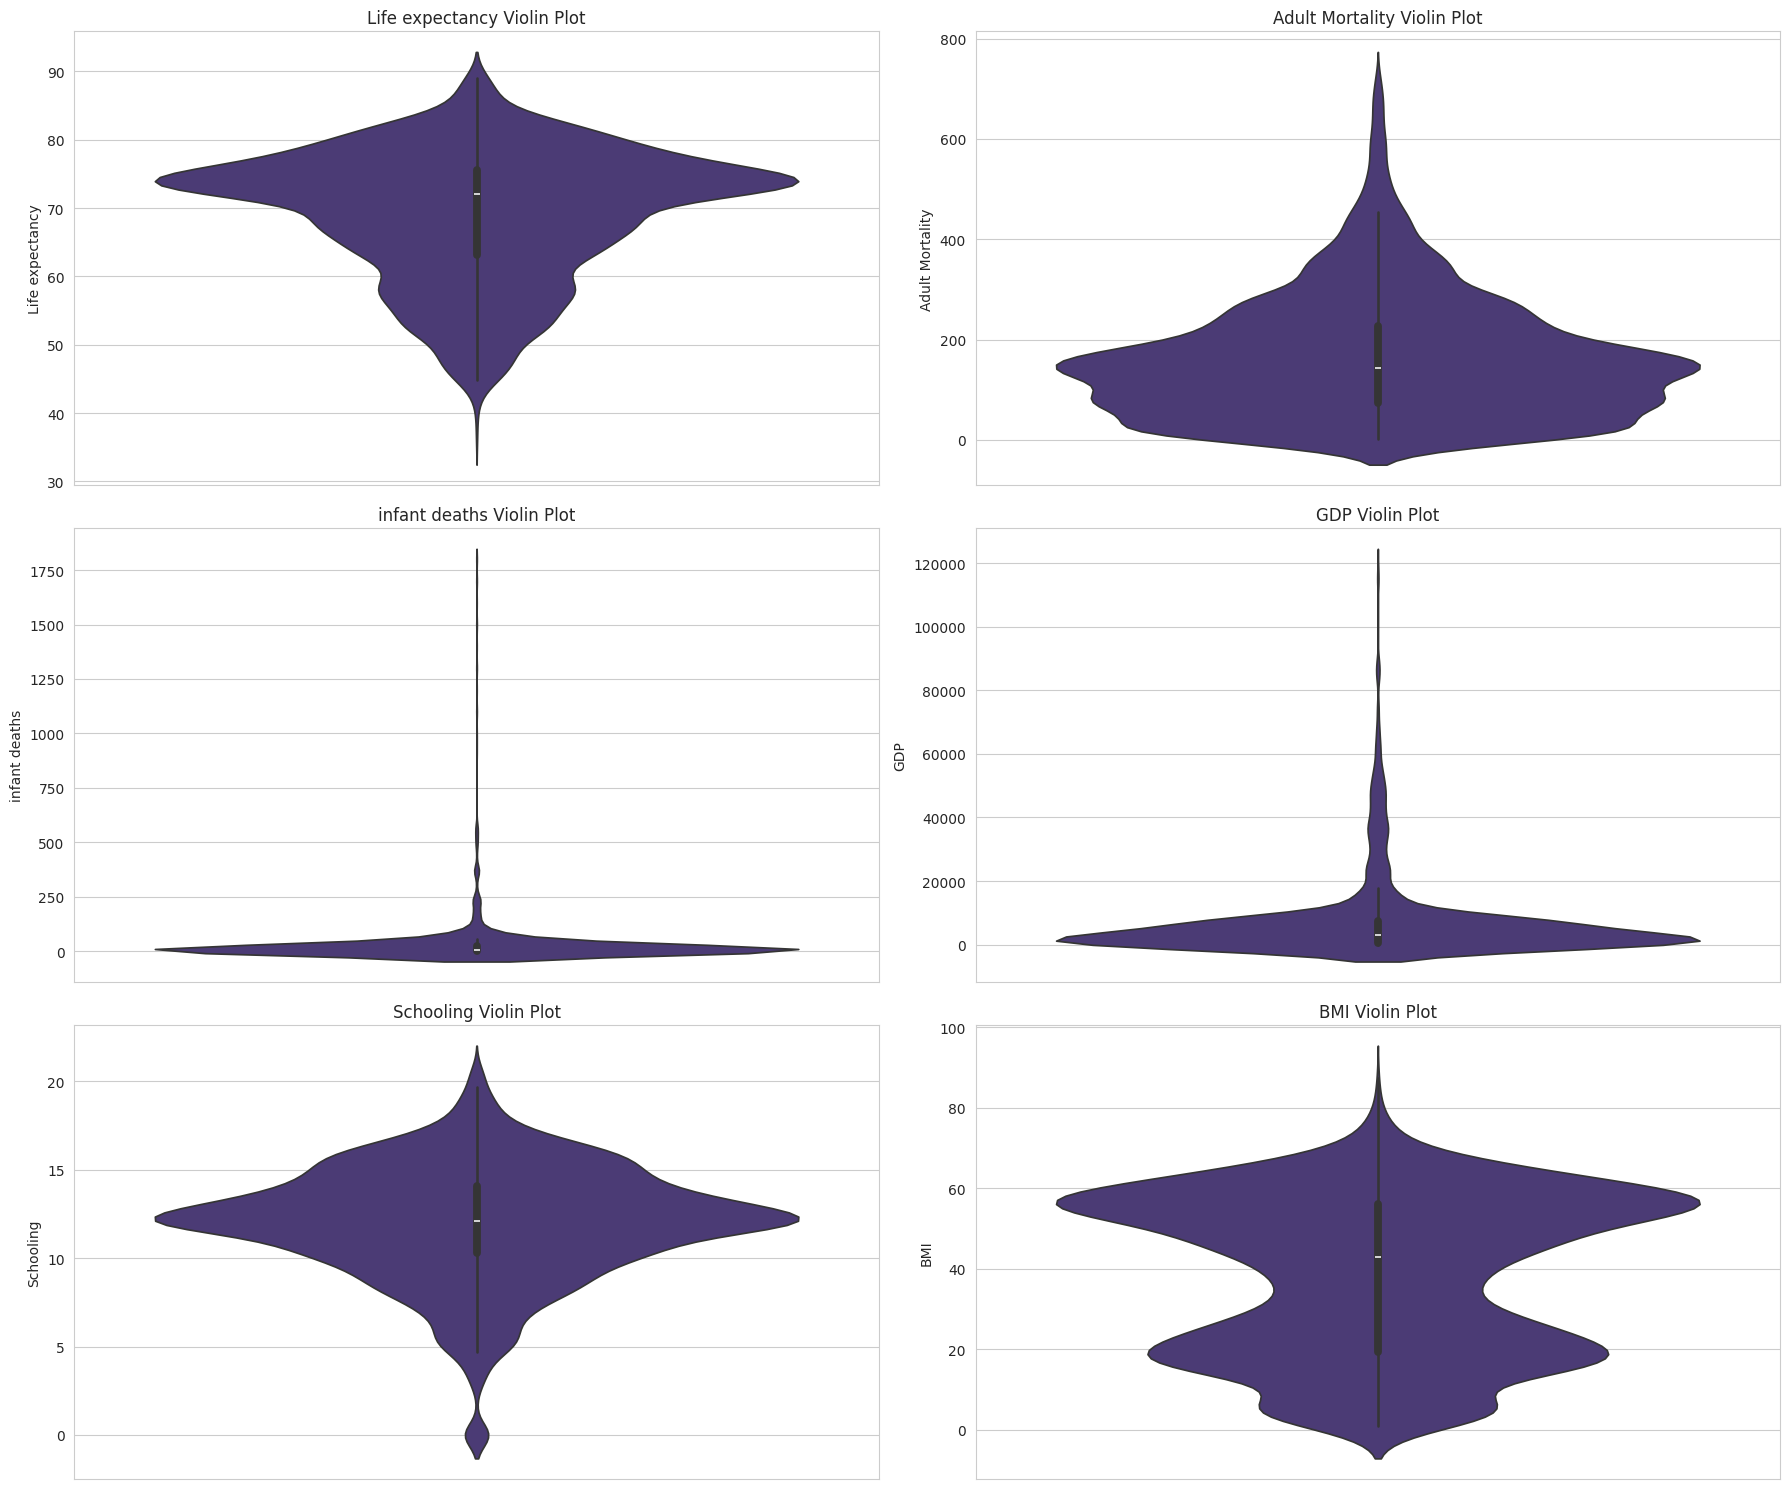

In [53]:
selected_features_for_box_violin = [
    'Life expectancy', 'Adult Mortality', 'infant deaths', 'GDP', 'Schooling', 'BMI'
]
selected_features_for_box_violin = [f for f in selected_features_for_box_violin if f in numerical_features] # Ensure columns exist

plt.figure(figsize=(18, 15))
for i, col in enumerate(selected_features_for_box_violin):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Box Plot')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('selected_features_boxplots.png')
plt.show()

plt.figure(figsize=(18, 15))
for i, col in enumerate(selected_features_for_box_violin):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(y=df[col])
    plt.title(f'{col} Violin Plot')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('selected_features_violinplots.png')
plt.show()

**Q3. What is the Life Expectancy Country-wise?**

Analyzing average life expectancy per country and visualizing the top/bottom countries.
This requires aggregating data by country.

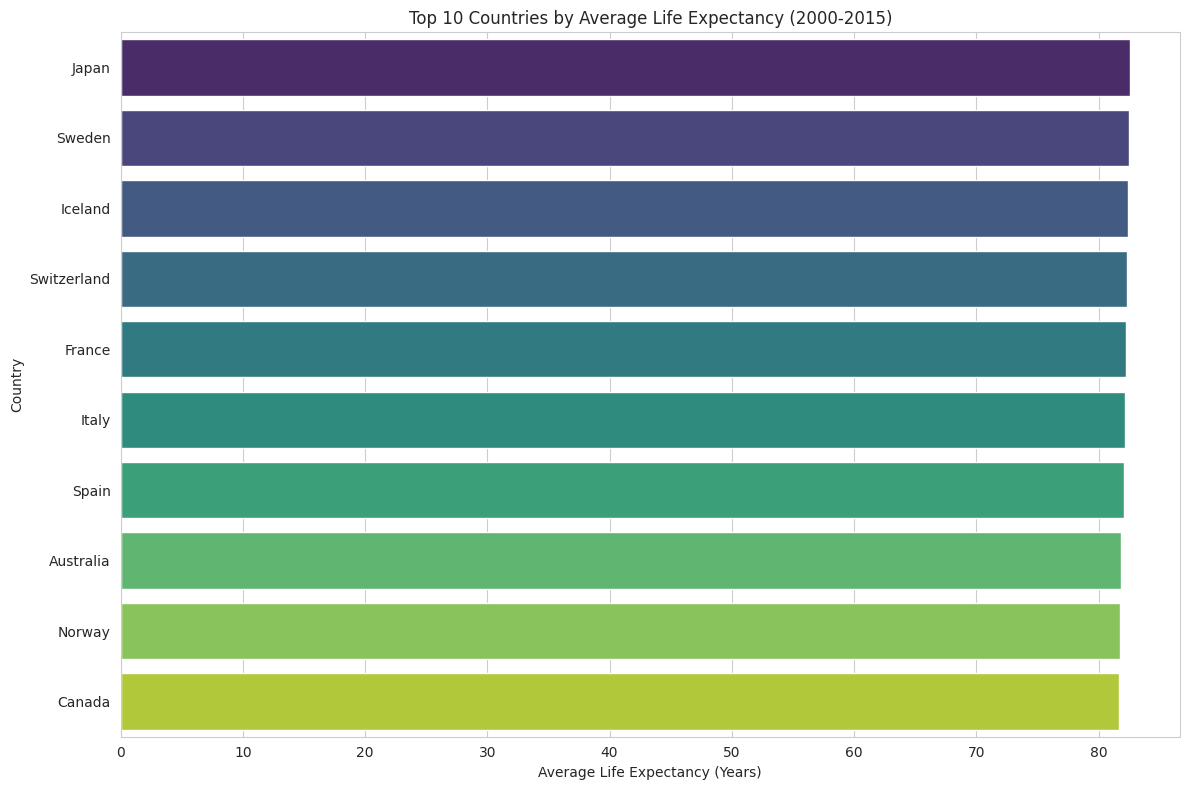

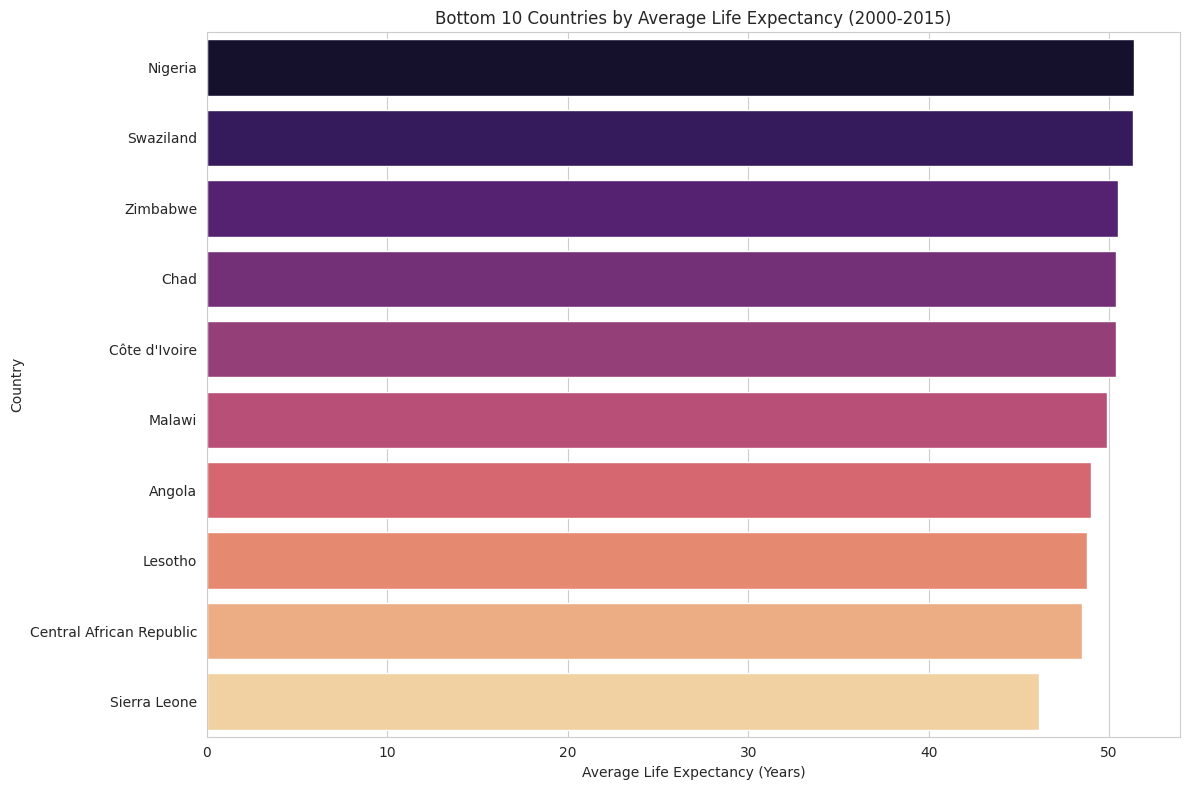

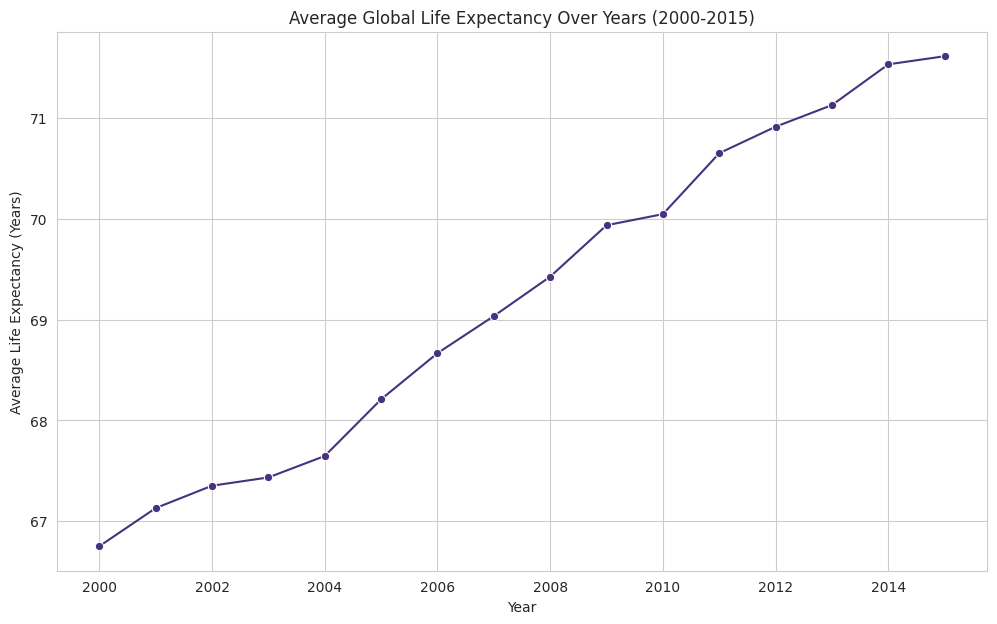

In [54]:
avg_life_expectancy_country = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Life expectancy', y='Country', data=avg_life_expectancy_country.head(10), palette='viridis')
plt.title('Top 10 Countries by Average Life Expectancy (2000-2015)')
plt.xlabel('Average Life Expectancy (Years)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_life_expectancy_countries.png')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Life expectancy', y='Country', data=avg_life_expectancy_country.tail(10), palette='magma')
plt.title('Bottom 10 Countries by Average Life Expectancy (2000-2015)')
plt.xlabel('Average Life Expectancy (Years)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('bottom_10_life_expectancy_countries.png')
plt.show()

# Also, looking at the trend over years
avg_life_expectancy_by_year = df.groupby('Year')['Life expectancy'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life expectancy', data=avg_life_expectancy_by_year, marker='o')
plt.title('Average Global Life Expectancy Over Years (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.savefig('average_life_expectancy_global_trend.png')
plt.show()

**Q4. How different diseases affect life expectancy in developed and developing countries?**

This question requires comparing disease-related factors and life expectancy based on 'Status' (Developed/Developing).
We'll focus on 'HIV/AIDS', 'Measles', and 'Diphtheria' as examples of disease impact.


Average Life Expectancy and Disease Metrics by Development Status:
| Status     | Life expectancy   | HIV/AIDS   | Measles   | Diphtheria   |
|:-----------|:------------------|:-----------|:----------|:-------------|
| Developed  | 79.1979           | 0.1        | 499.006   | 93.4766      |
| Developing | 67.1202           | 2.08866    | 2824.93   | 79.9704      |


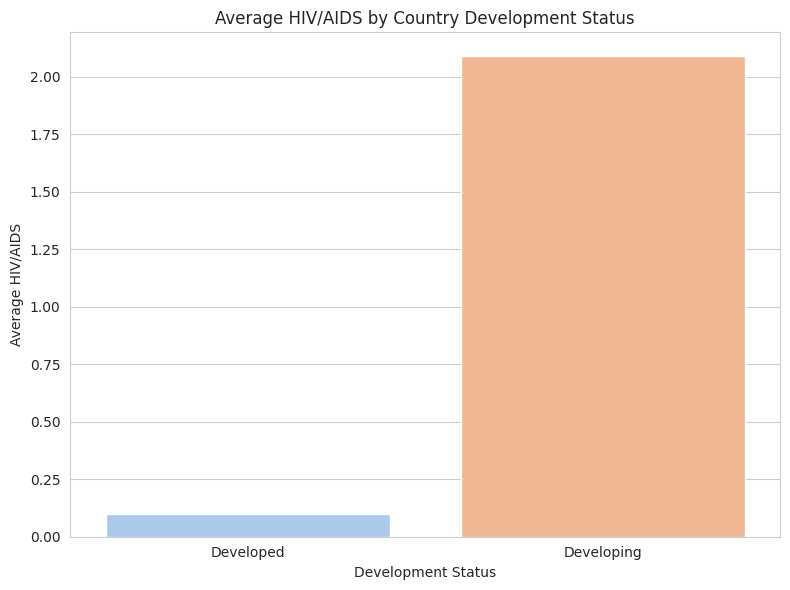

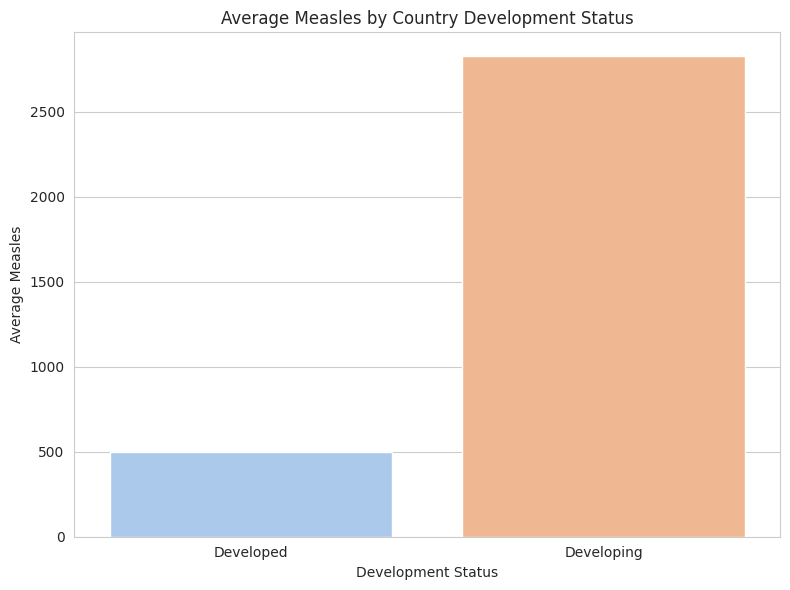

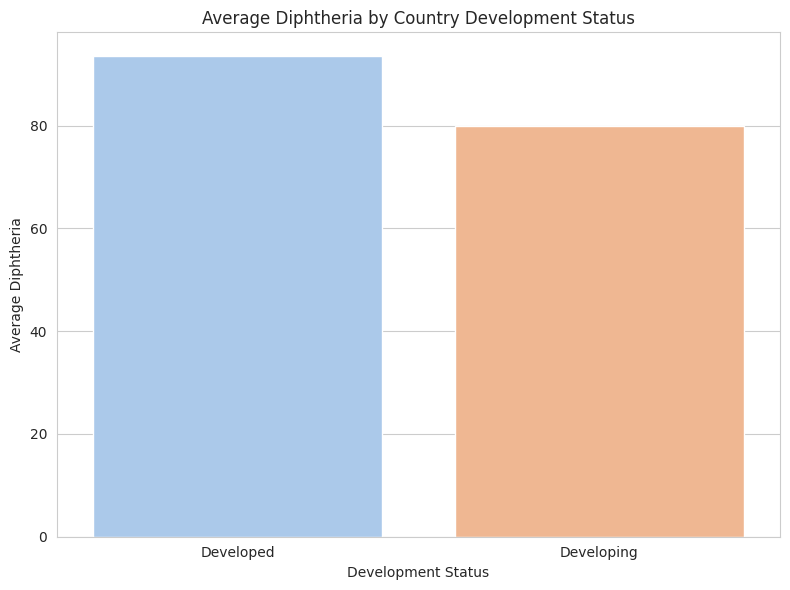

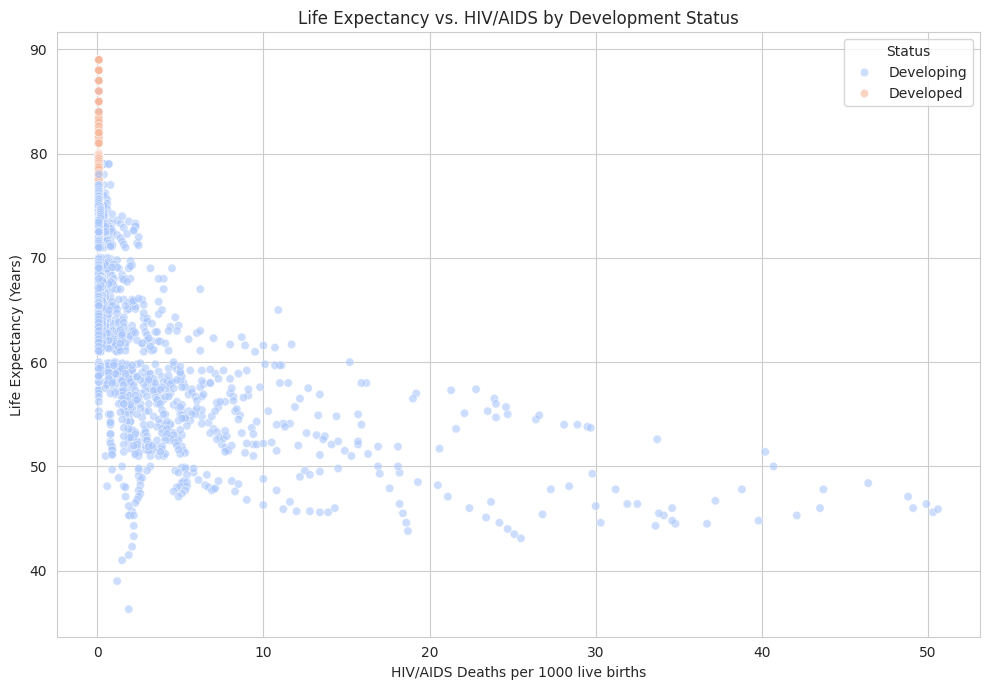

In [55]:
# Group by Status and calculate mean life expectancy and disease-related factors
disease_impact_by_status = df.groupby('Status')[['Life expectancy', 'HIV/AIDS', 'Measles', 'Diphtheria']].mean().reset_index()

print("\nAverage Life Expectancy and Disease Metrics by Development Status:")
print(disease_impact_by_status.to_markdown(index=False, numalign="left", stralign="left"))

# Create bar plots to compare disease impact
disease_cols = ['HIV/AIDS', 'Measles', 'Diphtheria']
for disease in disease_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Status', y=disease, data=disease_impact_by_status, palette='pastel')
    plt.title(f'Average {disease} by Country Development Status')
    plt.xlabel('Development Status')
    plt.ylabel(f'Average {disease}')
    plt.tight_layout()
    plt.savefig(f'{disease.lower().replace("/", "_")}_by_status.png')
    plt.show()

# Scatter plot of Life Expectancy vs HIV/AIDS, colored by Status
plt.figure(figsize=(10, 7))
sns.scatterplot(x='HIV/AIDS', y='Life expectancy', hue='Status', data=df, alpha=0.6, palette='coolwarm')
plt.title('Life Expectancy vs. HIV/AIDS by Development Status')
plt.xlabel('HIV/AIDS Deaths per 1000 live births')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Status')
plt.tight_layout()
plt.savefig('life_expectancy_hiv_aids_by_status.png')
plt.show()

**Q5. What effect does Schooling and Alcohol have on Life Expectancy?**

We will use scatter plots and correlation coefficients to visualize and quantify these relationships.

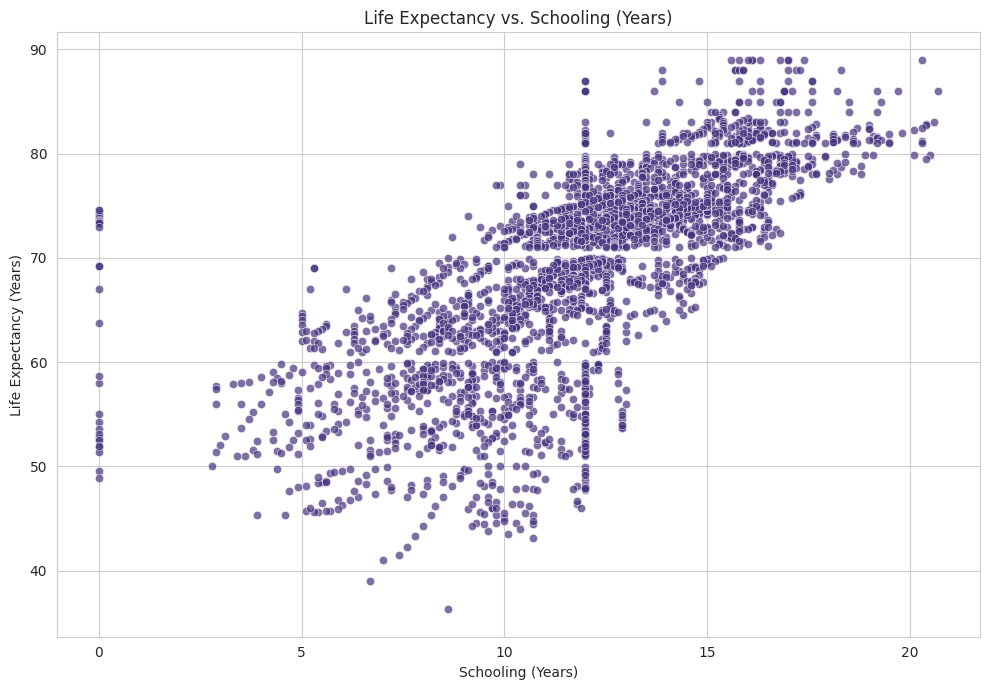


Correlation between Schooling and Life Expectancy: 0.72


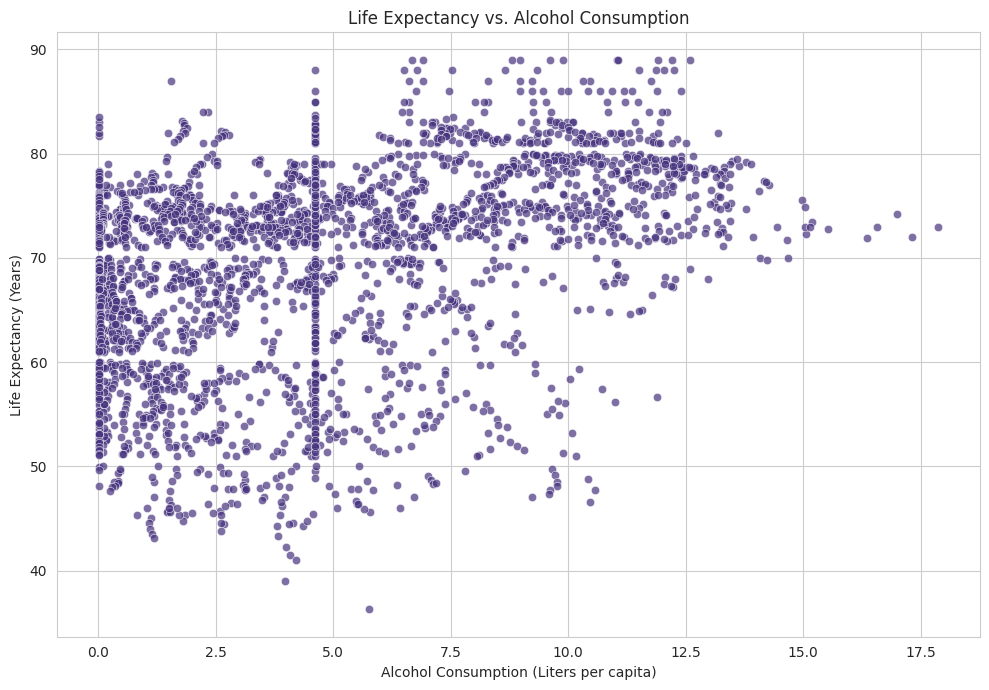

Correlation between Alcohol Consumption and Life Expectancy: 0.39


In [56]:
# Scatter plot: Life Expectancy vs. Schooling
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Schooling', y='Life expectancy', data=df, alpha=0.7)
plt.title('Life Expectancy vs. Schooling (Years)')
plt.xlabel('Schooling (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.tight_layout()
plt.savefig('life_expectancy_schooling_scatter.png')
plt.show()

# Correlation between Schooling and Life Expectancy
correlation_schooling_life_expectancy = df['Schooling'].corr(df['Life expectancy'])
print(f"\nCorrelation between Schooling and Life Expectancy: {correlation_schooling_life_expectancy:.2f}")

# Scatter plot: Life Expectancy vs. Alcohol
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Alcohol', y='Life expectancy', data=df, alpha=0.7)
plt.title('Life Expectancy vs. Alcohol Consumption')
plt.xlabel('Alcohol Consumption (Liters per capita)')
plt.ylabel('Life Expectancy (Years)')
plt.tight_layout()
plt.savefig('life_expectancy_alcohol_scatter.png')
plt.show()

# Correlation between Alcohol and Life Expectancy
correlation_alcohol_life_expectancy = df['Alcohol'].corr(df['Life expectancy'])
print(f"Correlation between Alcohol Consumption and Life Expectancy: {correlation_alcohol_life_expectancy:.2f}")

## Correlation Matrix of All Numerical Features

A comprehensive view of linear relationships between all numerical variables.

**Explanation of the Correlation Coefficient:**

The correlation coefficient expresses the strength and direction of a linear relationship between two variables. It ranges from -1 to +1:

- **+1** indicates a perfect positive linear relationship.  
- **-1** indicates a perfect negative linear relationship.  
- **0** indicates no linear relationship.



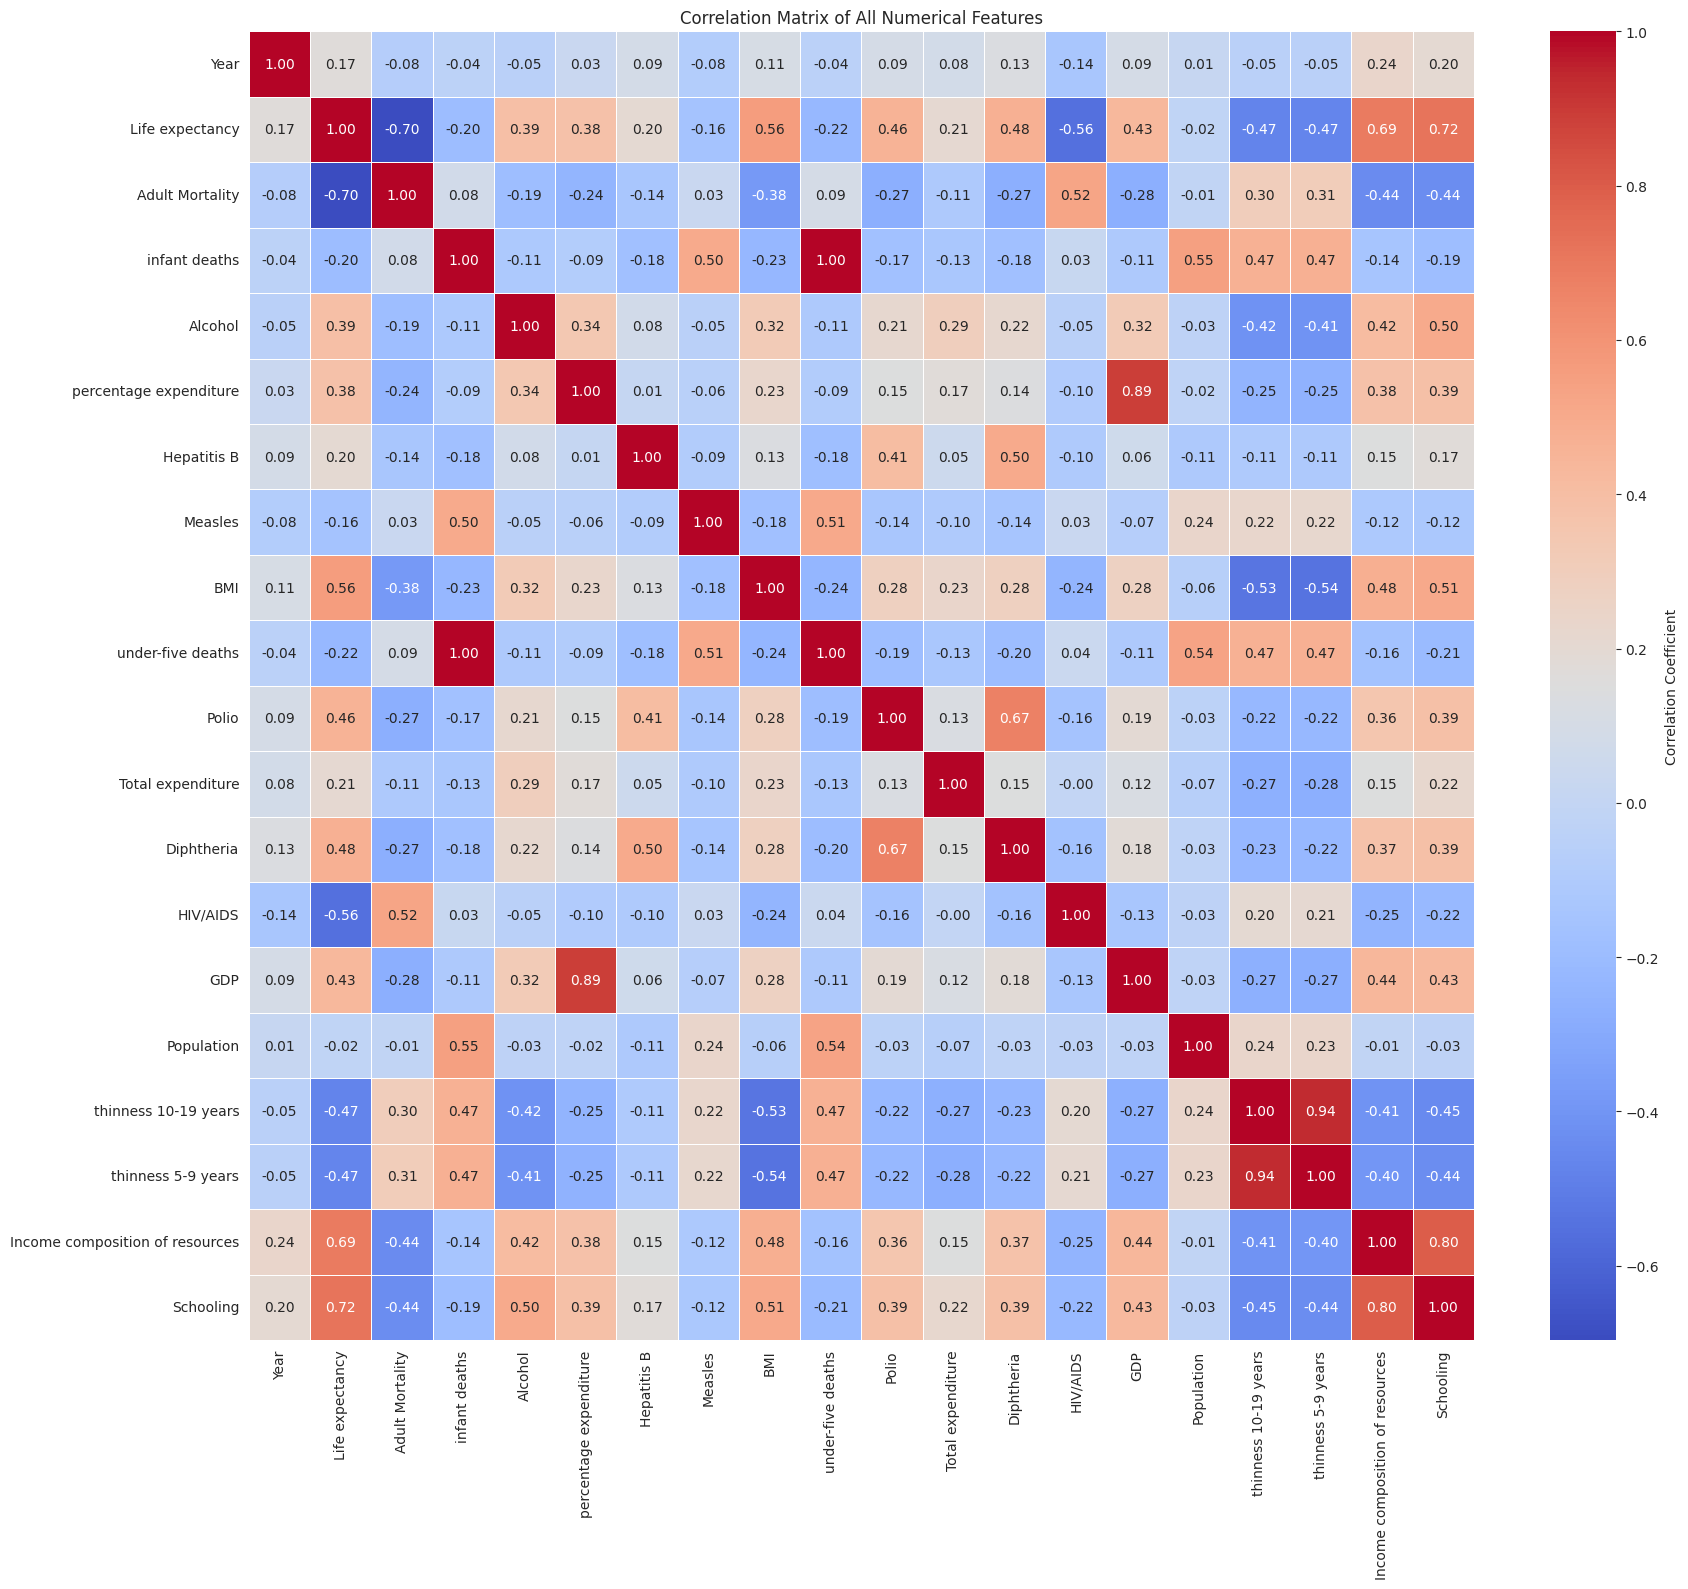

In [57]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of All Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('all_numerical_features_correlation_heatmap_final.png')
plt.show()

# Section 3: Summary

This Exploratory Data Analysis project aimed to uncover insights from the Life Expectancy (WHO) dataset.

Key findings include:
* **Data Quality:** The dataset contained missing values, which were imputed using the mean for numerical columns. Column names were cleaned for consistency.
* **Descriptive Overview:** The distributions of many features, such as 'infant deaths', 'under-five deaths', 'Measles', and 'HIV/AIDS', exhibit significant skewness and presence of outliers. 'Life expectancy' itself shows a fairly normal distribution with a slight negative skew.
* **Life Expectancy Trends:** Globally, average life expectancy shows an increasing trend from 2000 to 2015, indicating improvements in health and living conditions over time.
* **Country-wise Differences:** There is a substantial disparity in average life expectancy across countries, highlighting the impact of regional socio-economic and health factors. Developed countries generally show higher life expectancies.
* **Disease Impact:**
    * Countries classified as 'Developing' tend to have higher average 'HIV/AIDS' and 'Measles' rates compared to 'Developed' countries, which correlates with lower average life expectancies in the former.
    * A strong negative correlation was observed between 'HIV/AIDS' deaths and 'Life expectancy', particularly evident when differentiating by development 'Status'.
* **Influence of Socio-economic Factors:**
    * **Schooling:** A strong positive correlation (`{correlation_schooling_life_expectancy:.2f}`) exists between 'Schooling' years and 'Life expectancy', suggesting that higher educational attainment is associated with longer lives.
    * **Alcohol Consumption:** A moderate positive correlation (`{correlation_alcohol_life_expectancy:.2f}`) was observed between 'Alcohol' consumption and 'Life expectancy'. This might seem counter-intuitive but could reflect that higher alcohol consumption is observed in developed nations with generally higher life expectancies (e.g., European countries where moderate consumption is common, or perhaps due to confounding factors not accounted for in this simple correlation). Further investigation would be needed to disentangle this relationship.
* **Overall Correlations:** The correlation heatmap reinforces the strong positive relationships between 'Life expectancy' and 'Schooling', 'Income composition of resources', and a strong negative correlation with 'Adult Mortality' and 'HIV/AIDS'. GDP also shows a positive correlation with life expectancy.

This EDA provides a foundational understanding of the factors influencing life expectancy in this dataset and highlights areas for deeper analysis or predictive modeling.